#  germantrafficsigns

In [14]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io import loadmat
import pickle
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [15]:
path = '../ten-datasets/germantrafficsigns/'
#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')

In [16]:
num_classes = df.shape[0]
print(df.shape)
df.head()

(43, 2)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [17]:
#load the dataset into a dataframe

training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"

with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [18]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


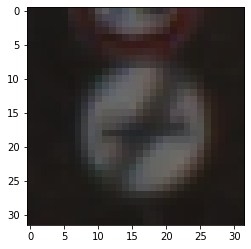

In [20]:
plt.imshow(X_train[0])

In [21]:
print("Number of classes: {}".format(num_classes))
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

Number of classes: 43
Image Shape: (32, 32, 3)
Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


# Preprocess Data
## Shuffle the training data.


(34799, 32, 32, 3)

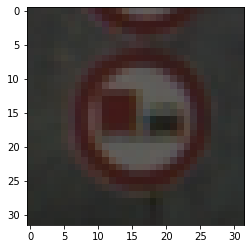

In [9]:
X_train, y_train = shuffle(X_train, y_train)
plt.imshow(X_train[0])
X_train.shape

# shallow learning

> ### RandomForest

> ### Softmax Regression

### data processing

In [10]:
import cv2

In [11]:
def equi_hist(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image

In [12]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [13]:
X_train_adv = np.array(list(map(preprocess, X_train)))
X_test_adv = np.array(list(map(preprocess, X_test)))
X_valid_adv = np.array(list(map(preprocess, X_valid)))


(34799, 32, 32)

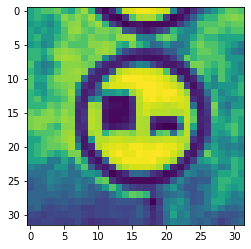

In [14]:
plt.imshow(X_train_adv[0])
X_train_adv.shape # one channel gray image

In [15]:
def to_2_dim(X_org):
    print("before: ",X_org.shape)
    X_size = len(X_org)
    TwoDim_X = X_org.reshape(X_size,-1)
    print("after:",TwoDim_X.shape)
    return TwoDim_X


In [16]:
TwoDim_X_train_adv= to_2_dim(X_train_adv) # to 2 dim
TwoDim_X_test_adv = to_2_dim(X_test_adv)
TwoDim_X_valid_adv = to_2_dim(X_valid_adv)

before:  (34799, 32, 32)
after: (34799, 1024)
before:  (12630, 32, 32)
after: (12630, 1024)
before:  (4410, 32, 32)
after: (4410, 1024)


## Random Forest


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
%%time
forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=50,
                                n_estimators = 800, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
forest.fit(TwoDim_X_train_adv,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.6min finished


CPU times: user 9min 17s, sys: 8.25 s, total: 9min 25s
Wall time: 1min 58s


0.6653064743239748

In [19]:
%%time
y_train_predict = forest.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
# y_train_predict

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    6.2s finished


forest Train Accuracy: 0.678
CPU times: user 23.6 s, sys: 1.7 s, total: 25.3 s
Wall time: 6.45 s


In [20]:
y_valid_predict = forest.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s


softmax_reg Test Accuracy: 0.637


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.8s finished


In [21]:
%%time
y_test_predict = forest.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.4s


forest Test Accuracy: 0.626
CPU times: user 8.5 s, sys: 700 ms, total: 9.2 s
Wall time: 2.55 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    2.4s finished


## Softmax Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
%%time
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(TwoDim_X_train_adv, y_train)

CPU times: user 1min 34s, sys: 2.57 s, total: 1min 37s
Wall time: 26.5 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
%%time
y_train_predict = softmax_reg.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("softmax_reg Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

softmax_reg Train Accuracy: 0.912
CPU times: user 579 ms, sys: 20.5 ms, total: 599 ms
Wall time: 155 ms


In [25]:
y_valid_predict = softmax_reg.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

softmax_reg Test Accuracy: 0.802


In [26]:
y_test_predict = softmax_reg.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

softmax_reg Test Accuracy: 0.796


# deep learning
> #### CNN
> #### MLP
> #### RNN

In [22]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.utils.vis_utils import plot_model

In [23]:
print(X_train.shape)
print(y_train.shape)
y_train[0]

(34799, 32, 32, 3)
(34799,)


41

# Normalization


In [25]:

batch_size = 128
num_classes = 43 # 10
# epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)


X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'valid samples')
print(X_test.shape[0], 'test samples')

y_train = y_train.reshape(y_train.shape[0])
y_valid = y_valid.reshape(y_valid.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print(y_train.shape)
print(y_test.shape)

# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes) #one hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

X_train shape: (34799, 32, 32, 3)
34799 train samples
4410 valid samples
12630 test samples
(34799,)
(12630,)


(34799, 43)

## CNN

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
________________________________________________

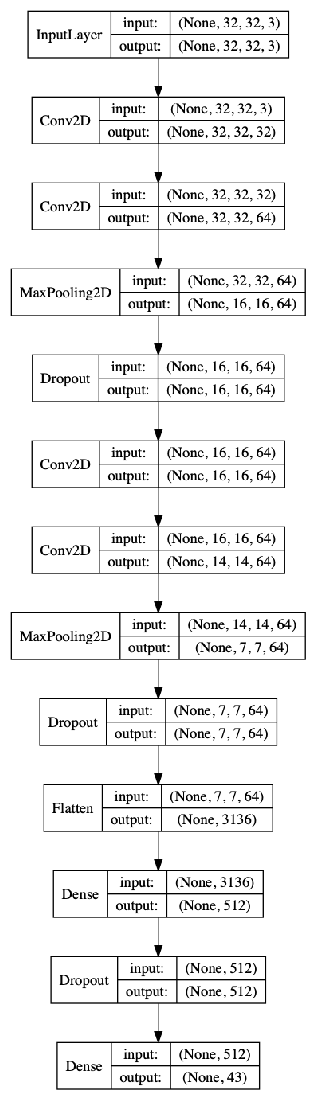

In [26]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


image_name = 'trafficSigns_cnn_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
%%time

hist = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                 validation_data=(X_test, y_test)
                )
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 199s 6ms/step - loss: 1.4701 - accuracy: 0.5812 - val_loss: 0.4068 - val_accuracy: 0.8914
Epoch 2/10
34799/34799 [==============================] - 197s 6ms/step - loss: 0.1987 - accuracy: 0.9391 - val_loss: 0.2271 - val_accuracy: 0.9438
Epoch 3/10
34799/34799 [==============================] - 185s 5ms/step - loss: 0.0911 - accuracy: 0.9724 - val_loss: 0.2165 - val_accuracy: 0.9473
Epoch 4/10
34799/34799 [==============================] - 193s 6ms/step - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.1823 - val_accuracy: 0.9600
Epoch 5/10
34799/34799 [==============================] - 208s 6ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.1607 - val_accuracy: 0.9617
Epoch 6/10
34799/34799 [==============================] - 209s 6ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.1549 - val_accuracy: 0.9644
Epoch 7/10
347

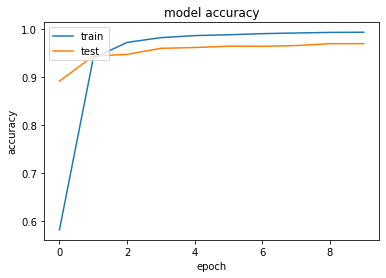

In [29]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

image_name = 'trafficSigns_cnn_accuracy.png'
plt.savefig(image_name)

plt.show()

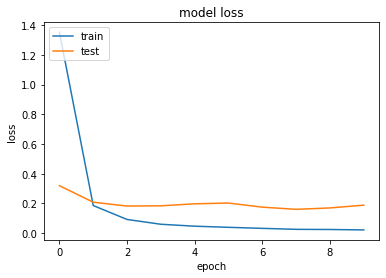

In [34]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)


In [36]:
predictions = model.predict(X_test) #X_test, y_test

In [37]:
predictions[2]

array([4.23238463e-35, 1.76824362e-33, 4.40600859e-34, 1.14034324e-36,
       4.00696700e-38, 1.16661085e-29, 1.12730814e-27, 0.00000000e+00,
       4.12025234e-34, 0.00000000e+00, 0.00000000e+00, 1.51604682e-32,
       4.72687390e-31, 3.13561178e-26, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.11420043e-31, 1.20302426e-35,
       1.14743497e-27, 0.00000000e+00, 1.14575627e-33, 1.52353722e-32,
       2.08722733e-29, 8.63499192e-30, 1.73664300e-27, 0.00000000e+00,
       7.45008747e-35, 1.09249001e-29, 2.65477476e-31, 6.03633570e-32,
       5.12823375e-31, 3.45262469e-32, 2.25590516e-18, 8.52612572e-30,
       1.05353238e-19, 1.15880339e-31, 1.00000000e+00, 1.89982494e-30,
       2.43025547e-23, 1.42911682e-28, 4.78174399e-35], dtype=float32)

In [38]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# MLP

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Flatten,Conv1D,GlobalMaxPooling1D,MaxPooling1D,GlobalAveragePooling1D,Input,MaxPool1D,BatchNormalization


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 43)                11051     
Total params: 1,715,755
Trainable params: 1,715,755
Non-trainable params: 0
____________________________________________

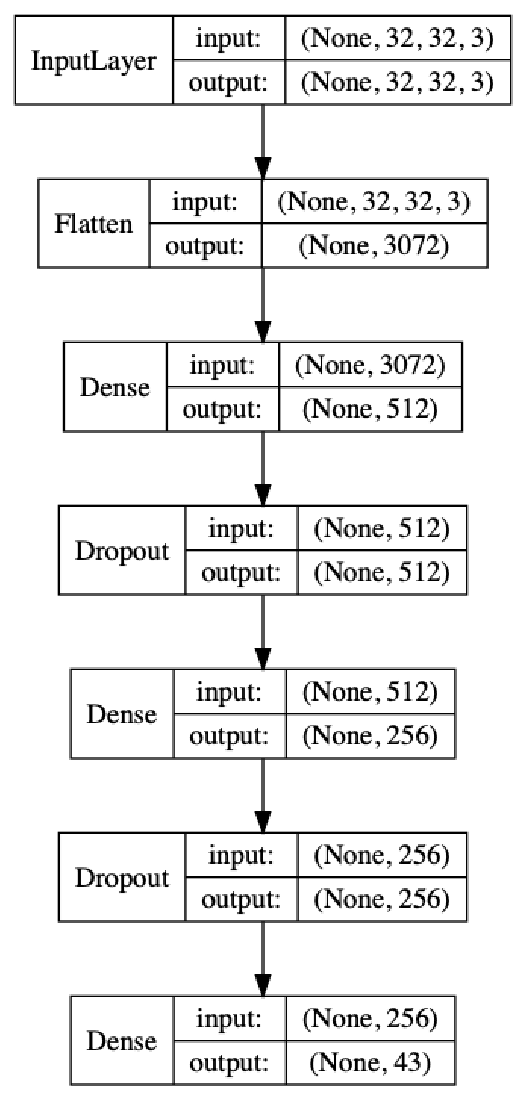

In [41]:
model = Sequential()
# model.add(Flatten(input_shape=X_train.shape + (3,)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))


model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


image_name = 'trafficSigns_ann_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
hist = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=1,shuffle=True,
                 validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 11s 325us/step - loss: 2.1293 - accuracy: 0.4113 - val_loss: 1.1699 - val_accuracy: 0.6477
Epoch 2/10
34799/34799 [==============================] - 11s 317us/step - loss: 0.8833 - accuracy: 0.7376 - val_loss: 0.8725 - val_accuracy: 0.7429
Epoch 3/10
34799/34799 [==============================] - 11s 319us/step - loss: 0.6327 - accuracy: 0.8119 - val_loss: 0.6887 - val_accuracy: 0.8009
Epoch 4/10
34799/34799 [==============================] - 11s 314us/step - loss: 0.5068 - accuracy: 0.8495 - val_loss: 0.6585 - val_accuracy: 0.8226
Epoch 5/10
34799/34799 [==============================] - 11s 315us/step - loss: 0.4524 - accuracy: 0.8643 - val_loss: 0.7087 - val_accuracy: 0.8211
Epoch 6/10
34799/34799 [==============================] - 11s 324us/step - loss: 0.4167 - accuracy: 0.8747 - val_loss: 0.7778 - val_accuracy: 0.8035
Epoch 7/10
34799/34799 [==============================] 

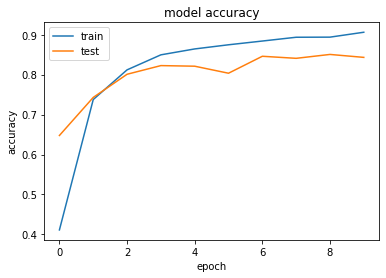

In [43]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

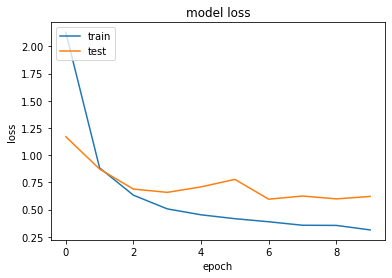

In [44]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
predictions = model.predict(X_test) #X_test, y_test

In [46]:
predictions[2]

array([1.5016602e-14, 2.2623654e-14, 1.1688938e-11, 6.6535133e-09,
       1.5439929e-12, 1.5329640e-10, 2.7957170e-10, 1.0849696e-13,
       2.0828617e-10, 1.1890066e-09, 7.7158474e-11, 3.4194730e-12,
       2.9367961e-10, 4.9908984e-09, 8.9964516e-13, 8.3909552e-10,
       1.0137991e-11, 1.2803979e-13, 9.7264454e-09, 3.0077118e-11,
       2.7923241e-05, 4.2384255e-14, 3.3570255e-09, 3.8441241e-09,
       6.4939537e-10, 6.5824852e-09, 4.0916741e-09, 3.9678424e-10,
       4.9404552e-09, 5.6659798e-12, 2.5298723e-09, 3.0101582e-10,
       5.0419757e-08, 2.7867303e-10, 2.5061245e-06, 1.2728945e-07,
       1.0413169e-05, 5.7087146e-10, 9.9995840e-01, 3.3735070e-10,
       2.7837808e-07, 2.8097085e-07, 2.8306621e-11], dtype=float32)

In [47]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## RNN

In [48]:
from keras.layers.recurrent import SimpleRNN

In [49]:
print(X_train_adv.shape)
print(X_test_adv.shape)

(34799, 32, 32)
(12630, 32, 32)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                4150      
_________________________________________________________________
dense_12 (Dense)             (None, 43)                2193      
Total params: 6,343
Trainable params: 6,343
Non-trainable params: 0
_________________________________________________________________


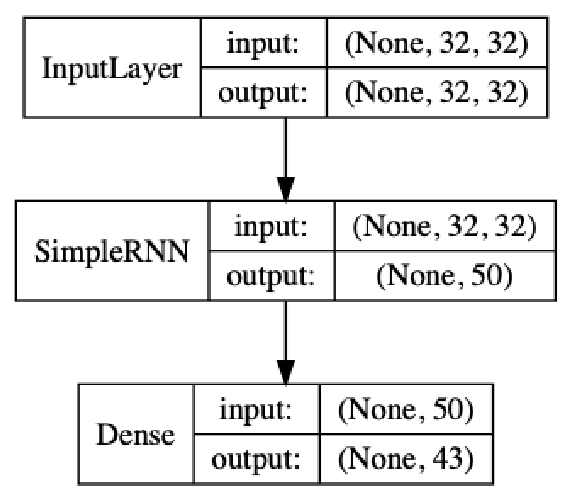

In [51]:
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape=(32,32) ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units = 50 ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(50,return_sequences=True))

model.add(Dense(43,activation = "softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

image_name = 'trafficSigns_rnn_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [52]:
hist = model.fit(X_train_adv, y_train,batch_size=128,epochs=20,verbose=1,shuffle=True,
                 validation_data=(X_test_adv, y_test))
score = model.evaluate(X_test_adv, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/20
34799/34799 [==============================] - 7s 198us/step - loss: 3.1636 - accuracy: 0.1400 - val_loss: 2.7858 - val_accuracy: 0.2097
Epoch 2/20
34799/34799 [==============================] - 3s 100us/step - loss: 2.4474 - accuracy: 0.2844 - val_loss: 2.4208 - val_accuracy: 0.2930
Epoch 3/20
34799/34799 [==============================] - 4s 108us/step - loss: 2.1068 - accuracy: 0.3730 - val_loss: 2.1762 - val_accuracy: 0.3628
Epoch 4/20
34799/34799 [==============================] - 4s 101us/step - loss: 1.8580 - accuracy: 0.4404 - val_loss: 1.9904 - val_accuracy: 0.4088
Epoch 5/20
34799/34799 [==============================] - 4s 102us/step - loss: 1.6504 - accuracy: 0.4986 - val_loss: 1.8029 - val_accuracy: 0.4652
Epoch 6/20
34799/34799 [==============================] - 3s 99us/step - loss: 1.4929 - accuracy: 0.5426 - val_loss: 1.6495 - val_accuracy: 0.5126
Epoch 7/20
34799/34799 [==============================] - 3s 10

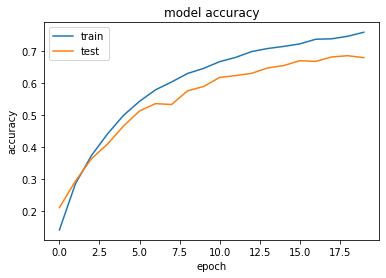

In [53]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

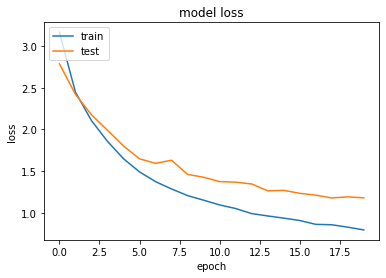

In [54]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()